In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import joblib
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron:
    def __init__(self, eta:float = None, epochs: int = None):
        self.weights = np.random.randn(3) * 1e-4
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training is: \n{self.weights}")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, input, weights):
        return np.dot(input, weights)

    def activation_function(self, z):
        # activation function is step function 
        return np.where(z > 0, 1, 0) 
    def fit(self, x,y):
        self.x = x
        self.y = y
        x_with_bias = np.c_[self.x, -np.ones((len(self.x), 1))] 
        # shape shpould be same as that of x
        print(f"x with bias: \n{x_with_bias}")
        
        for epoch in range(self.epochs):
            print('--'*20)
            print(f"for epoch >> {epoch}")
            z = self._z_outcome(x_with_bias, self.weights)
            
            y_hat = self.activation_function(z)
            print(f"predicted value after forward path: \n {y_hat}")

            self.error = self.y - y_hat
            print(f"error: \n {self.error}")
            print('--'*20)

            self.weights = self.weights + self.eta*np.dot(x_with_bias.T, self.error)
            print(f"updates weights after epoch: {epoch+1} / {self.epochs} \n {self.weights}")
            print('##'*20)

    def predict(self, x ):
        x_with_bias = np.c_[x, -np.ones((len(x), 1))]
        z = self._z_outcome(x_with_bias, self.weights)
        return self.activation_function(z) 
        
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"total loss: {total_loss}\n")
        return total_loss
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok = True)
        return os.path.join(model_dir, filename)
        
    def save(self, filename, model_dir = None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self,model_file_path)           
        
    def load(self, filepath):
        return joblib.load(filepath)

    

In [3]:
def prepare_data(df, target_col = 'y'):
    x = df.drop(target_col, axis = 1)
    y = df[target_col]
    return x, y

In [4]:
# Define the dataset
AND = {
    'x1': [0,0,1,1],
    'x2' : [0,1,0,1],
    'y': [0,0,0,1]
}
df_AND = pd.DataFrame(AND)


In [5]:
OR = {
    'x1': [0,0,1,1],
    'x2' : [0,1,0,1],
    'y': [0,1,1,1]
}
df_OR = pd.DataFrame(OR)


In [6]:
XOR = {
    'x1': [0,0,1,1],
    'x2' : [0,1,0,1],
    'y': [0,1,1,0]
}
df_XOR = pd.DataFrame(XOR)


In [18]:
x, y = prepare_data(df_OR)
x, y = prepare_data(df_AND)
x, y = prepare_data(df_XOR)


In [19]:
ETA = .1  #ETA or learning rate b/w 0 and 1 
EPOCHS = 10 # No of itterations 
model_xor = Perceptron(eta = ETA, epochs = EPOCHS)
model_xor.fit(x,y)

model_or = Perceptron(eta = ETA, epochs = EPOCHS)
model_or.fit(x,y)


initial weights before training is: 
[-1.12132607e-04  8.66368719e-05 -6.10113655e-05]
x with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
----------------------------------------
for epoch >> 0
predicted value after forward path: 
 [1 1 0 1]
error: 
 0   -1
1    0
2    1
3    0
Name: y, dtype: int64
----------------------------------------
updates weights after epoch: 1 / 10 
 [ 9.98878674e-02  8.66368719e-05 -6.10113655e-05]
########################################
----------------------------------------
for epoch >> 1
predicted value after forward path: 
 [1 1 1 1]
error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
----------------------------------------
updates weights after epoch: 2 / 10 
 [9.98878674e-02 8.66368719e-05 9.99389886e-02]
########################################
----------------------------------------
for epoch >> 2
predicted value after forward path: 
 [0 0 0 1]
error: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
------------

In [9]:
# saving the model 
model_xor.save('XOR')


In [10]:
# loading the model 
load_xor = Perceptron().load('/content/model/XOR')

load_xor.predict([[1,0]])

array([1])

**the model works for the AND gat eand OR gate but not for the XOR gate. Reason Being XOR gate is non linear  and (AND  / OR gate is linear)**

This is disadvantage of perceptron model.
This is very obvious as while developing the model we were took a linear line to separate the dataset. 
 

In [15]:
def save_plot(df, model, filename = 'plot.png', plot_dir='plots'):
    def _create_base_plot(df):
        df.plot(kind = 'scatter', x = 'x1', y = 'x2', c = 'y', s = 100, cmap = 'coolwarm')
        plt.axhline(y = 0, color = 'black', linestyle= "--", linewidth = 1)
        plt.axvline(x = 0, color = 'black', linestyle= "--", linewidth = 1)
        figure = plt.gcf()
        figure.set_size_inches(10,8)

    def _plot_decision_region(x, y , classifier, resolution = .02):
        colors = ('cyan', 'lightgreen')
        cmap = ListedColormap(colors)
        x = x.values
        x1 = x[:,0]
        x2 = x[:,1]
        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1

        xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
        y_hat = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)

        plt.contourf(xx1,xx2, y_hat, alpha = .5 , cmap = cmap)
        plt.xlim(xx2.min() , xx2.max())
        plt.plot()

    x, y = prepare_data(df)
    _create_base_plot(df)
    _plot_decision_region(x, y , model)

    os.makedirs(plot_dir, exist_ok = True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)


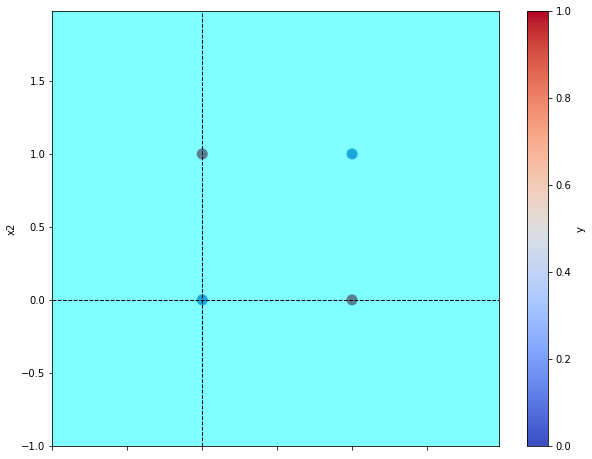

In [21]:
save_plot(df_OR,  model_or, filename = 'plot.png')
save_plot(df_XOR,  model_xor, filename = 'plot.png')

